In [2114]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2116]:
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore', category=UserWarning)

# Data Sourcing

In [2119]:
df_loan = pd.read_csv('loan.csv', low_memory=False)
#df_loan = pd.read_csv('loan.csv')

In [2120]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


# **Data Cleaning**


#### **1.**  It has been observed that some of columns have blank or NA as values. We cannot use those columns to do any analysis, hence we will   delete them from our dataset.

In [2123]:
df_loan.shape

(39717, 111)

In [2126]:
df_loan = df_loan.dropna(axis=1, how='all')

In [2128]:
df_loan.shape

(39717, 57)

#### ***2.*** Following columns have same values for all the rows and therefore they are not very usefull for analysis.
        1. pymnt_plan - value for this column is 'n' for all rows.
        2. policy_code - value for this column is '1' for all rows.
        2. application_type - value for this column is 'INDIVIDUAL' for all rows.
        3. initial_list_status - value for this column is 'f' for all rows.
        4. collections_12_mths_ex_med - value for this column is either '0' or NA for all rows.
        5. acc_now_delinq - value for this column is '0' for all rows.
        6. chargeoff_within_12_mths - value for this column is '0' for all rows.
        7. tax_liens - value for this column is '0' for all rows.


In [2132]:
cols_to_delete = ['pymnt_plan','policy_code','application_type','initial_list_status','collections_12_mths_ex_med','acc_now_delinq',
                  'chargeoff_within_12_mths','delinq_amnt','tax_liens']
df_loan = df_loan.drop(cols_to_delete, axis=1)

In [2134]:
df_loan.shape

(39717, 48)

#### ***3.*** Remove '%' from int_rate (Interest Rate) column and convert its datatype to float. 

In [2137]:
df_loan['int_rate'] = df_loan['int_rate'].apply(lambda x:  float(x[0:-1]))

</br>

#### ***4.*** Remove blank values, '%' from revol_util (Revolving line utilization rate) column and convert its datatype to float. 

In [2141]:
df_loan['revol_util'].isna().sum()

50

In [2143]:
df_loan['revol_util'] = df_loan['revol_util'].fillna(df_loan['revol_util'].mode()[0])

In [2145]:
df_loan['revol_util'] = df_loan['revol_util'].apply(lambda x: float(x[0:-1]))

In [2147]:
df_loan['revol_util'].dtypes

dtype('float64')

</br>

# **Data Analysis**
</br>
We will be doing data analysis using both univariate and bivariate analysis
</br>

## 1.  Variable  - Loan status
</br>

#### Plot a pie chart displaying the percentage of borrowers with their loan status

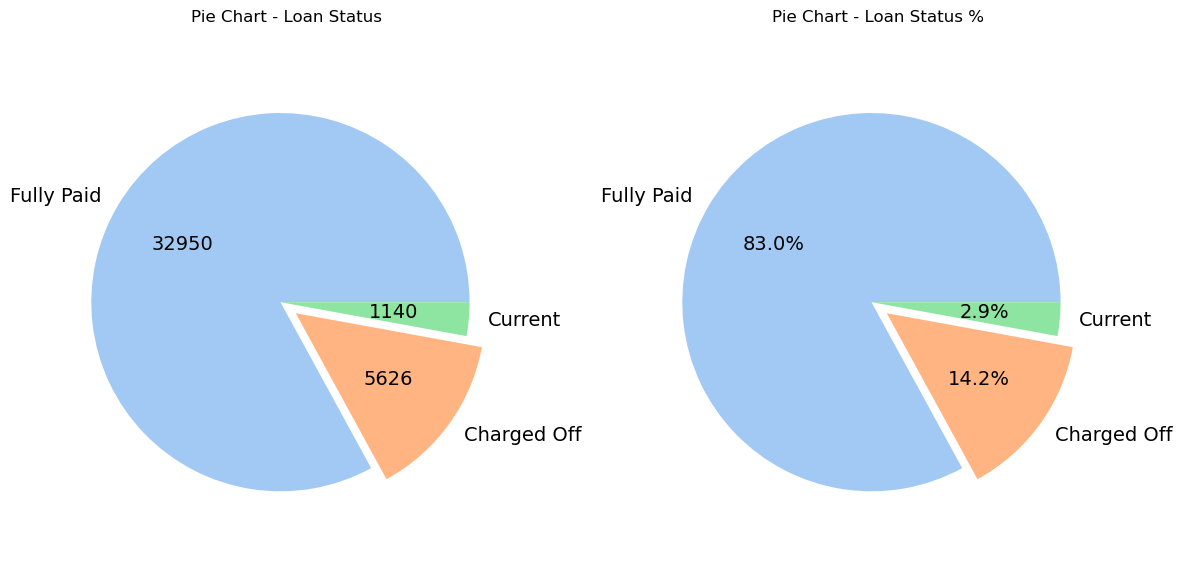

In [2153]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
labels=['Fully Paid','Charged Off','Current']
explode = (0, 0.1, 0)
loan_status_counts = df_loan['loan_status'].value_counts()

# First pie chart
axs[0].pie(loan_status_counts, labels=labels, explode = explode, autopct=lambda pct: f'{int(pct/100.*sum(df_loan['loan_status'].value_counts()))}',textprops={'fontsize':14})
axs[0].axis('equal')
axs[0].set_title('Pie Chart - Loan Status')

# Second pie chart
axs[1].pie(loan_status_counts, labels=['Fully Paid','Charged Off','Current'],explode = (0, 0.1, 0), autopct='%1.1f%%',textprops={'fontsize':14})
axs[1].axis('equal')
axs[1].set_title('Pie Chart - Loan Status %')


# Show the pie charts
plt.tight_layout()
plt.show()

#### From the above chart it is observed that 14.2% of total loans get defaulted.

</br>

## 2. Variable - Loan Amount

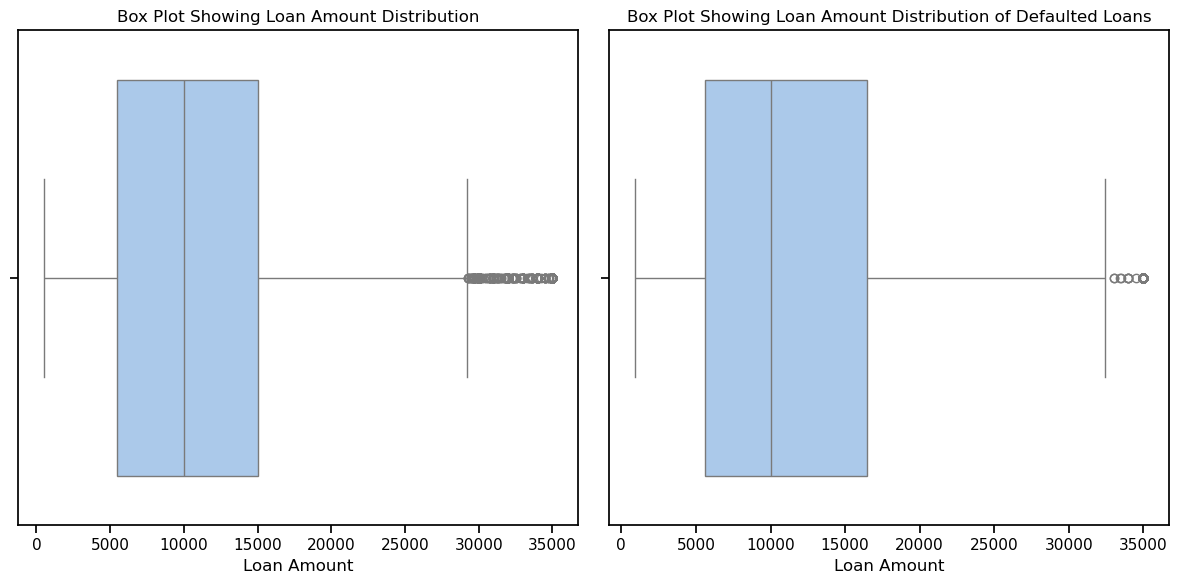

In [2158]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x = df_loan['loan_amnt'], ax=axes[0])
axes[0].set_title('Box Plot Showing Loan Amount Distribution')
axes[0].set_xlabel('Loan Amount')

df_loan_chargedoff = df_loan[df_loan['loan_status']=='Charged Off']
sns.boxplot(x = df_loan_chargedoff['loan_amnt'], ax=axes[1])
axes[1].set_title('Box Plot Showing Loan Amount Distribution of Defaulted Loans')
axes[1].set_xlabel('Loan Amount')

plt.tight_layout()
plt.show()

From the above chart it is observed that for majority of loans the loan amount is between 5000 and 15000 both in case of fully paid and defaulted loans.

</br>

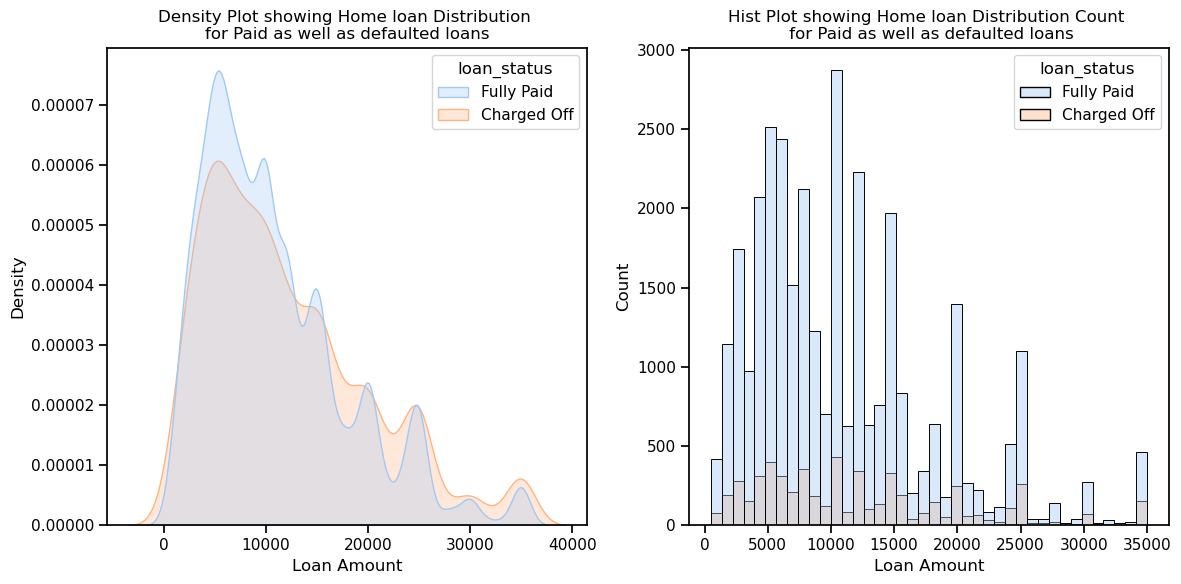

In [2161]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df_loan_home_filtered = df_loan[(df_loan['loan_status']) != 'Current']

sns.kdeplot(data=df_loan_home_filtered, x="loan_amnt", hue="loan_status", fill=True, common_norm=False, alpha=0.3, ax=axes[0])
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_title('Density Plot showing Home loan Distribution \nfor Paid as well as defaulted loans')
axes[0].set_xlabel('Loan Amount')
axes[0].set_ylabel('Density')

sns.set_context("notebook")
sns.set_palette("pastel")
sns.histplot(data=df_loan_home_filtered, x='loan_amnt', bins=40, hue='loan_status', multiple='layer', alpha=0.4,ax=axes[1])
axes[1].set_title('Hist Plot showing Home loan Distribution Count \n for Paid as well as defaulted loans')
axes[1].set_xlabel('Loan Amount')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


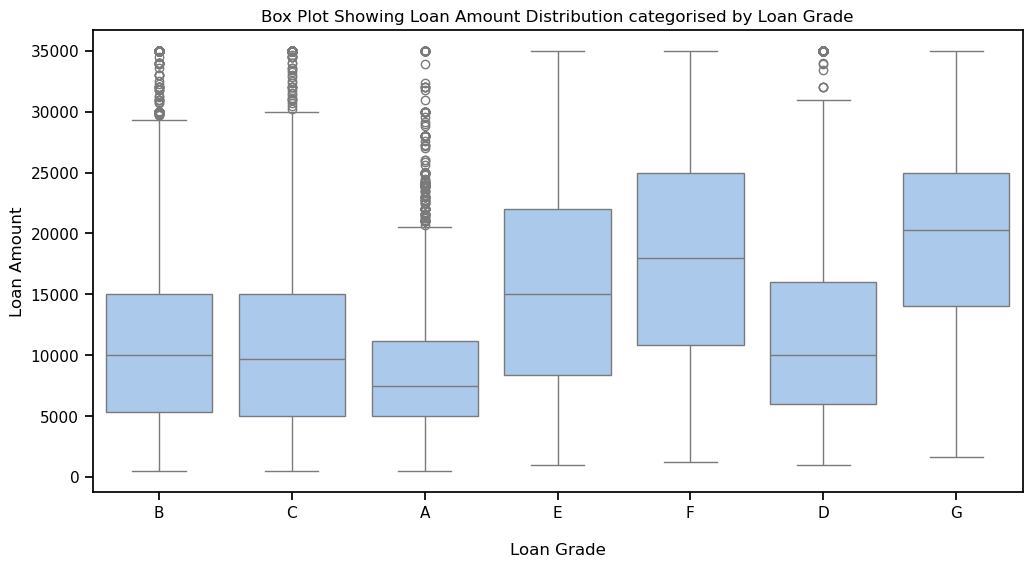

In [2162]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_loan, x="grade", y="loan_amnt")

plt.title('Box Plot Showing Loan Amount Distribution categorised by Loan Grade')
plt.xlabel('\nLoan Grade')
plt.ylabel('Loan Amount')
plt.show()

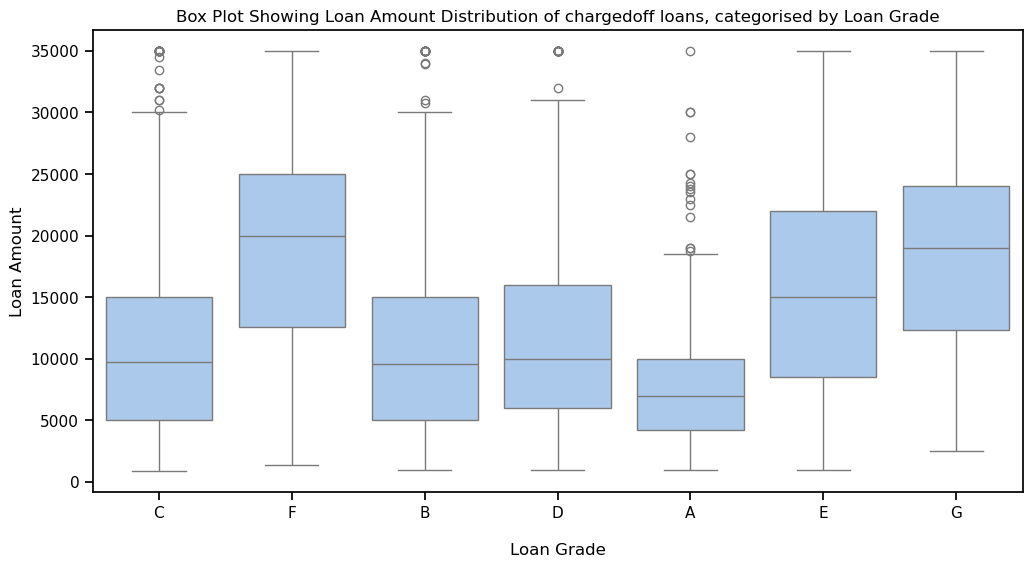

In [2163]:
df_loan_chargedoff = df_loan[df_loan['loan_status']=='Charged Off']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_loan_chargedoff, x="grade", y="loan_amnt")

plt.title('Box Plot Showing Loan Amount Distribution of chargedoff loans, categorised by Loan Grade')
plt.xlabel('\nLoan Grade')
plt.ylabel('Loan Amount')
plt.show()

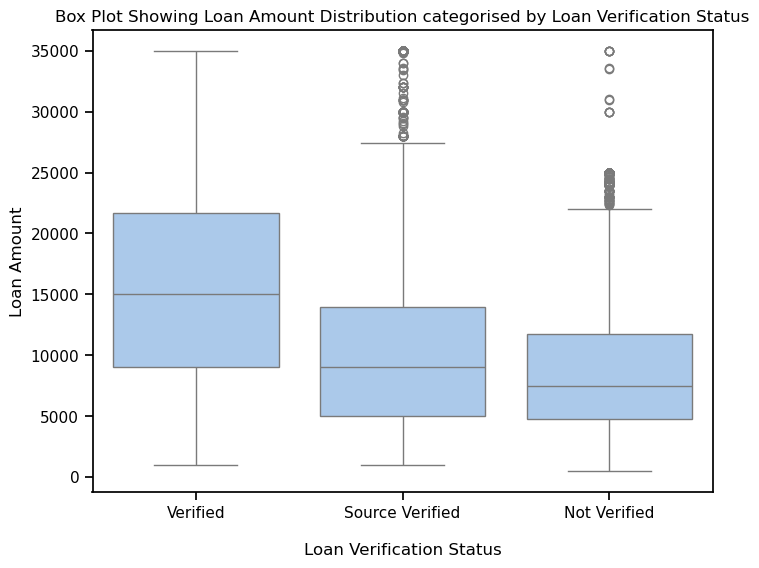

In [2164]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_loan, x="verification_status", y="loan_amnt")


plt.title('Box Plot Showing Loan Amount Distribution categorised by Loan Verification Status')
plt.xlabel('\nLoan Verification Status')
plt.ylabel('Loan Amount')
plt.show()

## 3. Variable - Home Ownership

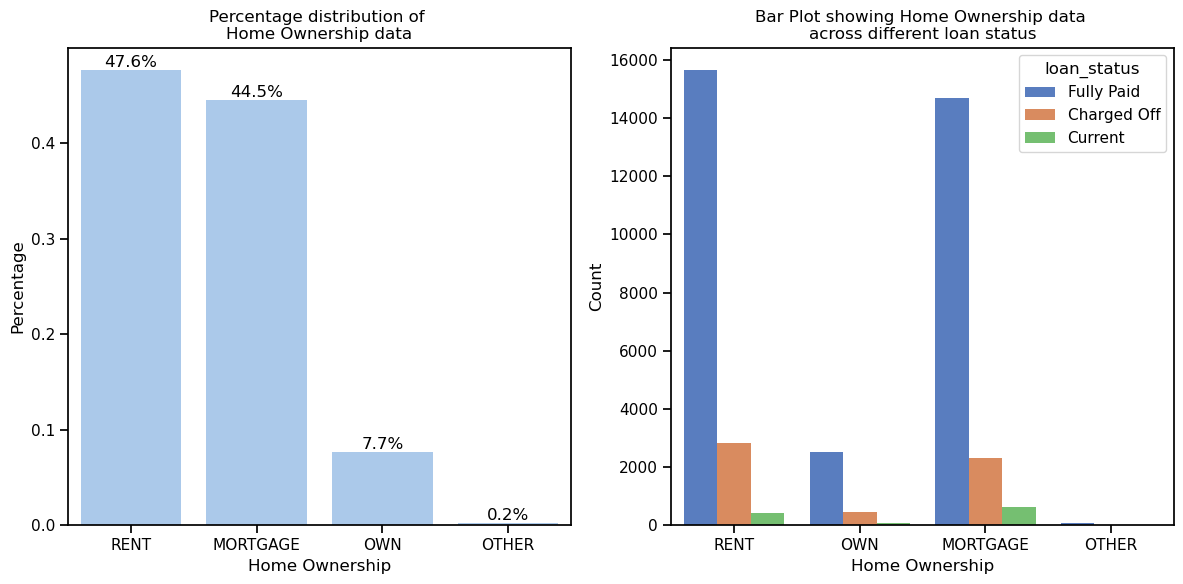

In [2166]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df_loan_home_ownership = df_loan[(df_loan['home_ownership']) != 'NONE']
count_data = df_loan_home_ownership['home_ownership'].value_counts(normalize=True).reset_index()
count_data.columns = ['home_ownership', 'percentage']

sns.barplot(data=count_data, x='home_ownership', y='percentage', ax=axes[0])

# Annotate percentages on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height() * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

axes[0].set_title('Percentage distribution of \nHome Ownership data')
axes[0].set_xlabel('Home Ownership')
axes[0].set_ylabel('Percentage')

sns.countplot(x='home_ownership',  data=df_loan_home_ownership, hue='loan_status', palette='muted',dodge=True, ax=axes[1])

axes[1].set_title('Bar Plot showing Home Ownership data \nacross different loan status')
axes[1].set_xlabel('Home Ownership')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 4. Variable - Loan purpose

In [2169]:
df_loan_home_ownership['purpose'].value_counts()

purpose
debt_consolidation    18640
credit_card            5130
other                  3991
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

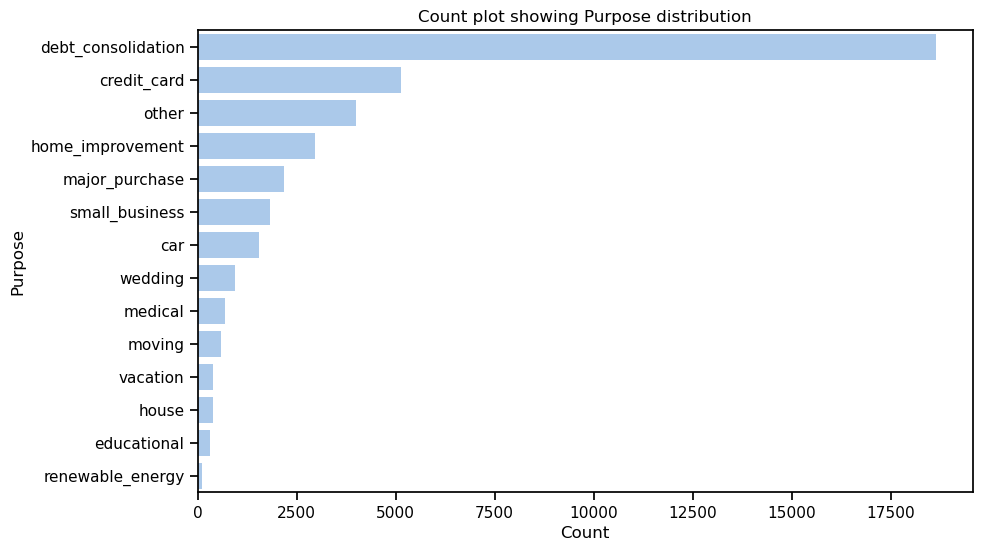

In [2171]:
plt.figure(figsize=(10, 6))
purpose_data = df_loan['purpose'].value_counts().index

sns.countplot(y='purpose', data=df_loan, order=purpose_data)

plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Count plot showing Purpose distribution')
plt.show()

plt.show()

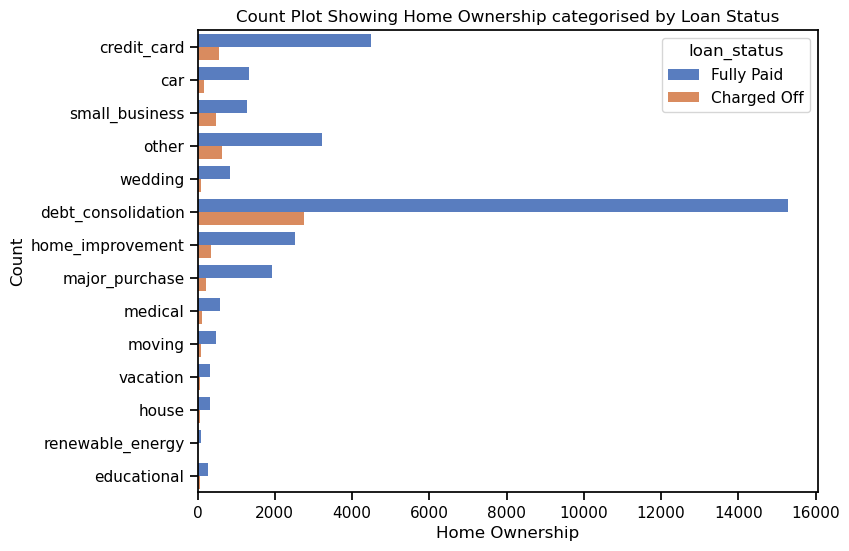

In [2230]:
df_loan_home_filtered = df_loan[(df_loan['loan_status']) != 'Current']
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='purpose',  data=df_loan_home_filtered, hue='loan_status', palette='muted')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

axes[0].set_title('Percentage distribution of \nHome Ownership data')
axes[0].set_xlabel('Home Ownership')
axes[0].set_ylabel('Percentage')

plt.title('Count Plot Showing Home Ownership categorised by Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

## 5. Variable - Verification status

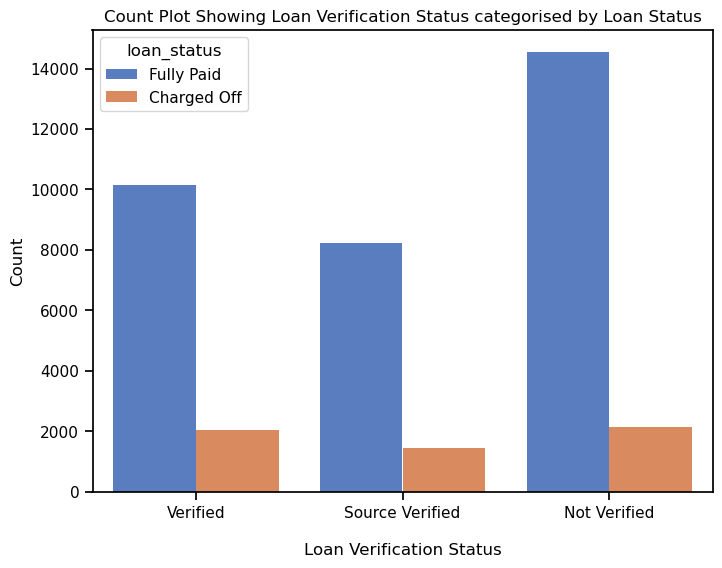

In [2232]:
df_loan_home_filtered = df_loan[(df_loan['loan_status']) != 'Current']

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='verification_status',  data=df_loan_home_filtered, hue='loan_status', palette='muted')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


# Add title and labels
plt.title('Count Plot Showing Loan Verification Status categorised by Loan Status')
plt.xlabel('\nLoan Verification Status')
plt.ylabel('Count')

plt.show()

## 6. Variable - dti

</br>

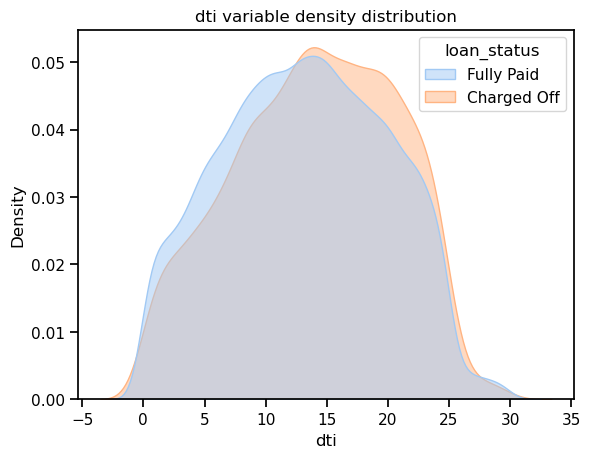

In [2236]:
df_loan_home_filtered = df_loan[(df_loan['loan_status']) != 'Current']

sns.kdeplot(data=df_loan_home_filtered, x="dti", hue="loan_status", fill=True, common_norm=False, alpha=0.5)


plt.xlabel('dti')
plt.ylabel('Density')
plt.title('dti variable density distribution')
plt.show()


## 7. Variable - Public Recorded Bankruptcies (pub_rec_bankruptcies)

</br>

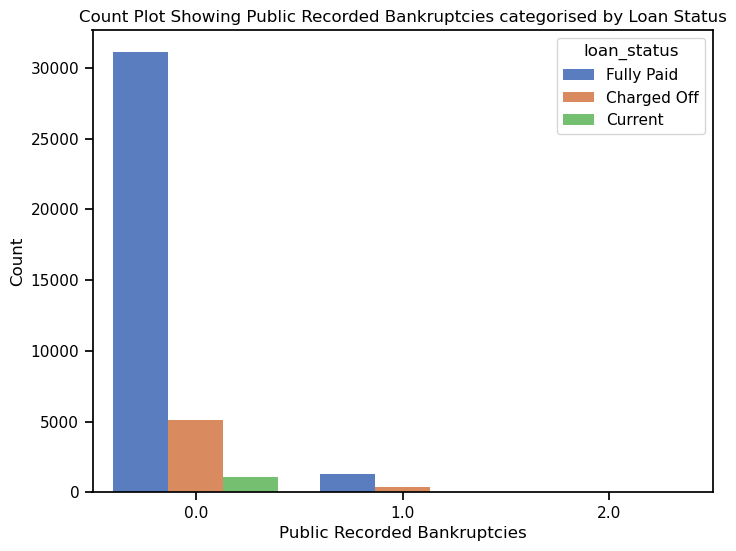

In [2238]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='pub_rec_bankruptcies',  data=df_loan, hue='loan_status', palette='muted')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.title('Count Plot Showing Public Recorded Bankruptcies categorised by Loan Status')
plt.xlabel('Public Recorded Bankruptcies')
plt.ylabel('Count')
plt.show()

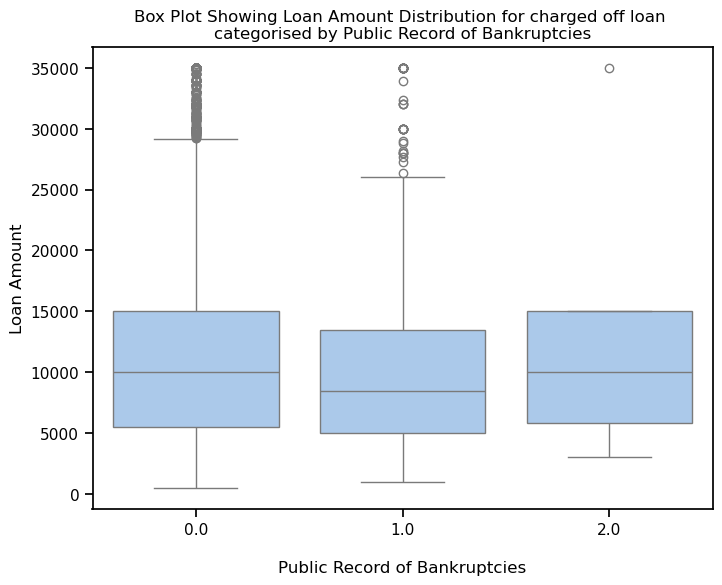

In [2191]:
df_loan_home_filtered = df_loan[(df_loan['loan_status']) == 'Charged Off']
plt.figure(figsize=(8, 6))
#ax = sns.countplot(x='pub_rec_bankruptcies',  data=df_loan, hue='loan_status', palette='muted')
sns.boxplot(data=df_loan, x="pub_rec_bankruptcies", y="loan_amnt")


plt.title('Box Plot Showing Loan Amount Distribution for charged off loan \ncategorised by Public Record of Bankruptcies')
plt.xlabel('\nPublic Record of Bankruptcies')
plt.ylabel('Loan Amount')
plt.show()

## 8. Variable - Term

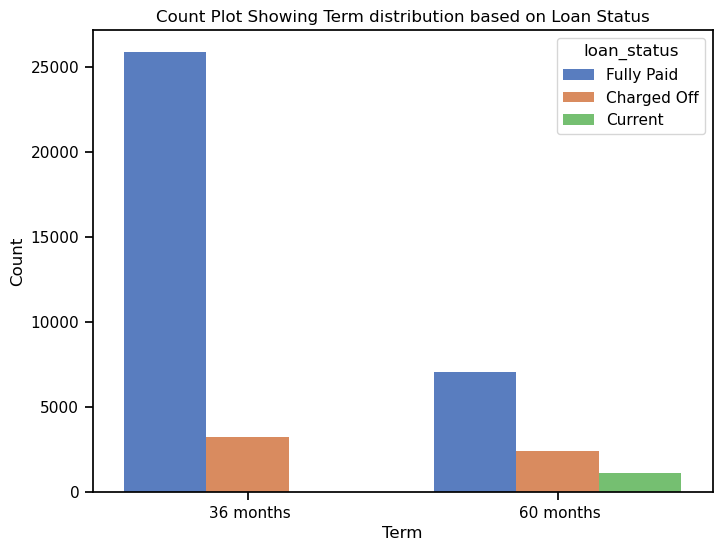

In [2240]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='term',  data=df_loan, hue='loan_status', palette='muted')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.title('Count Plot Showing Term distribution based on Loan Status')
plt.ylabel('Count')
plt.xlabel('Term')

plt.show()

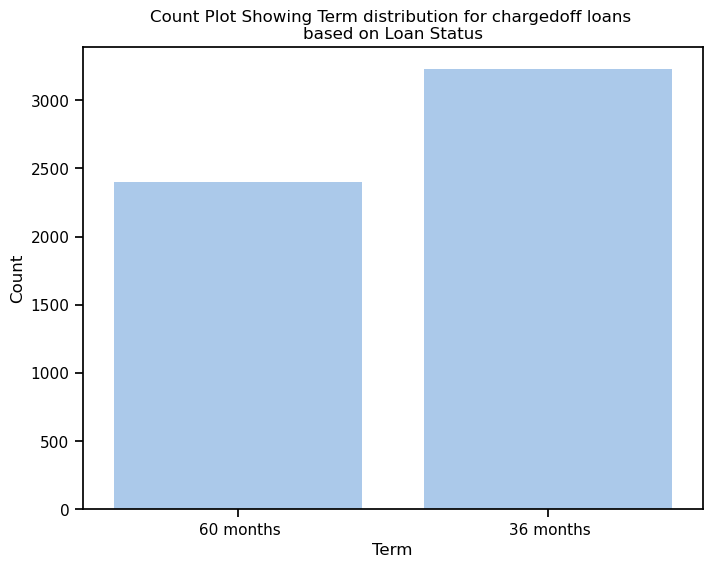

In [2196]:
df_loan_home_filtered = df_loan[(df_loan['loan_status']) == 'Charged Off']
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='term',  data=df_loan_home_filtered)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


# Add title and labels
plt.title('Count Plot Showing Term distribution for chargedoff loans \nbased on Loan Status')
plt.ylabel('Count')
plt.xlabel('Term')

plt.show()

</br>

## 9. Variable - Installment

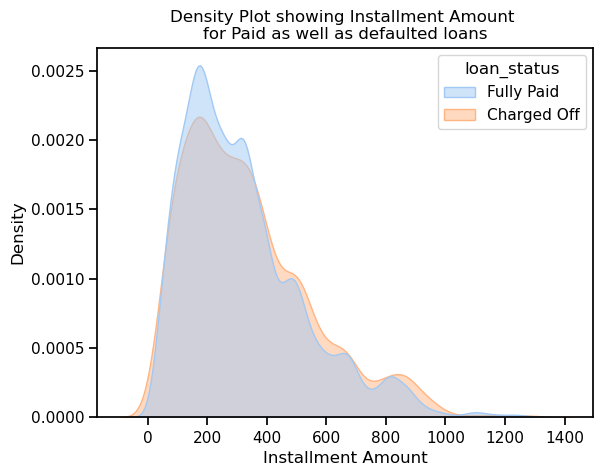

In [2242]:
df_loan_home_loan_status = df_loan[(df_loan['loan_status']) != 'Current']
# Create the density plot
sns.kdeplot(data=df_loan_home_loan_status, x="installment", hue="loan_status", fill=True, common_norm=False, alpha=0.5)

plt.xlabel('Installment Amount')
plt.ylabel('Density')
plt.title('Density Plot showing Installment Amount \nfor Paid as well as defaulted loans')
plt.show()


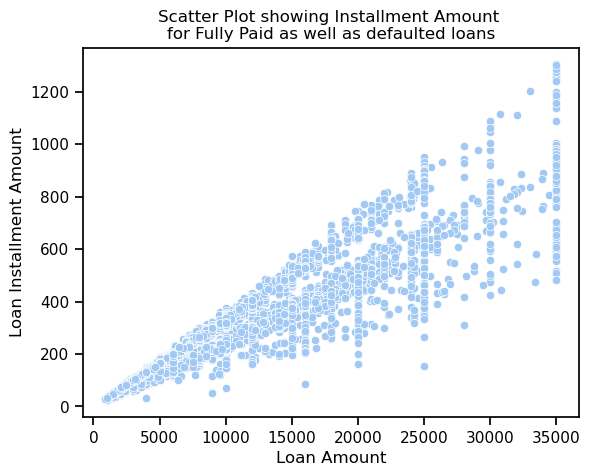

In [2202]:
df_loan_filtered = df_loan[(df_loan['loan_status']) == 'Charged Off']
df_loan_filtered = df_loan_filtered[(df_loan['term']) != '36 months']
sns.scatterplot(x='loan_amnt',y='installment', data=df_loan_filtered)
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Loan Amount')
plt.ylabel('Loan Installment Amount')
plt.title('Scatter Plot showing Installment Amount \nfor Fully Paid as well as defaulted loans')
plt.show()

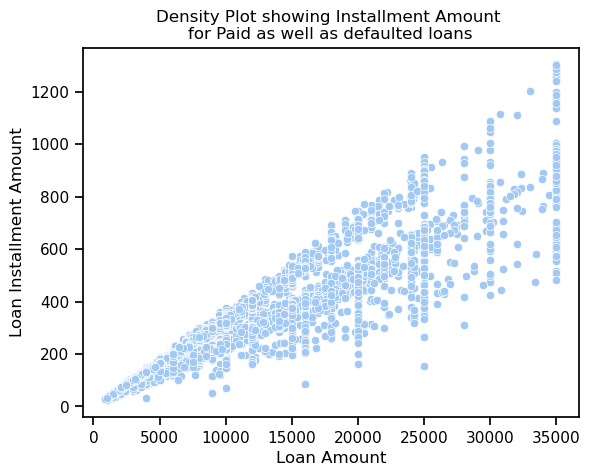

In [2204]:
df_loan_filtered = df_loan[(df_loan['loan_status']) == 'Charged Off']
df_loan_filtered = df_loan_filtered[(df_loan['term']) != '60 months']
sns.scatterplot(x='loan_amnt',y='installment', data=df_loan_filtered)
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Loan Amount')
plt.ylabel('Loan Installment Amount')
plt.title('Density Plot showing Installment Amount \nfor Paid as well as defaulted loans')
plt.show()

## 10. Variable - Grade

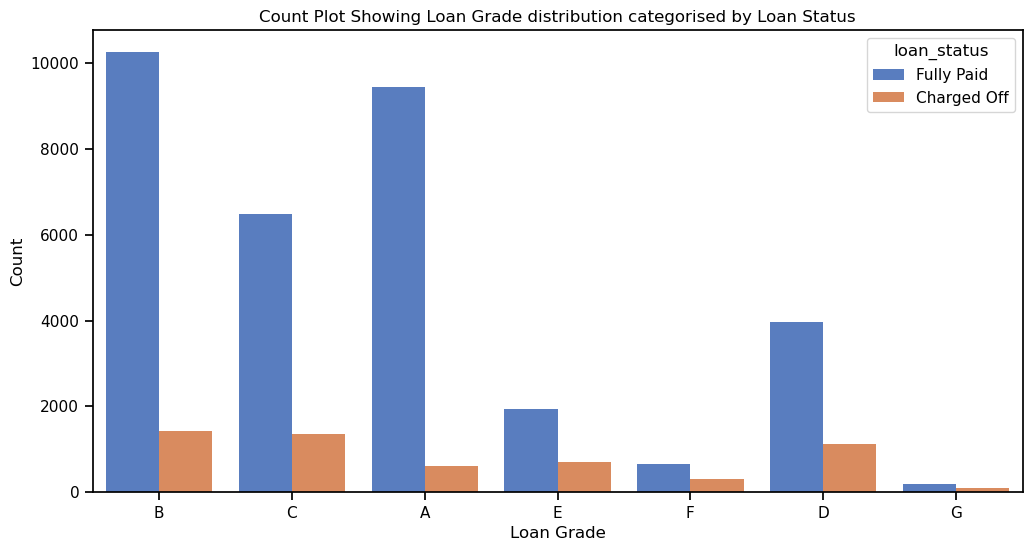

In [2244]:
df_loan_home_filtered = df_loan[(df_loan['loan_status']) != 'Current']
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='grade',  data=df_loan_home_filtered, hue='loan_status', palette='muted')

plt.title('Count Plot Showing Loan Grade distribution categorised by Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()

## 11. Variable - Interest rate

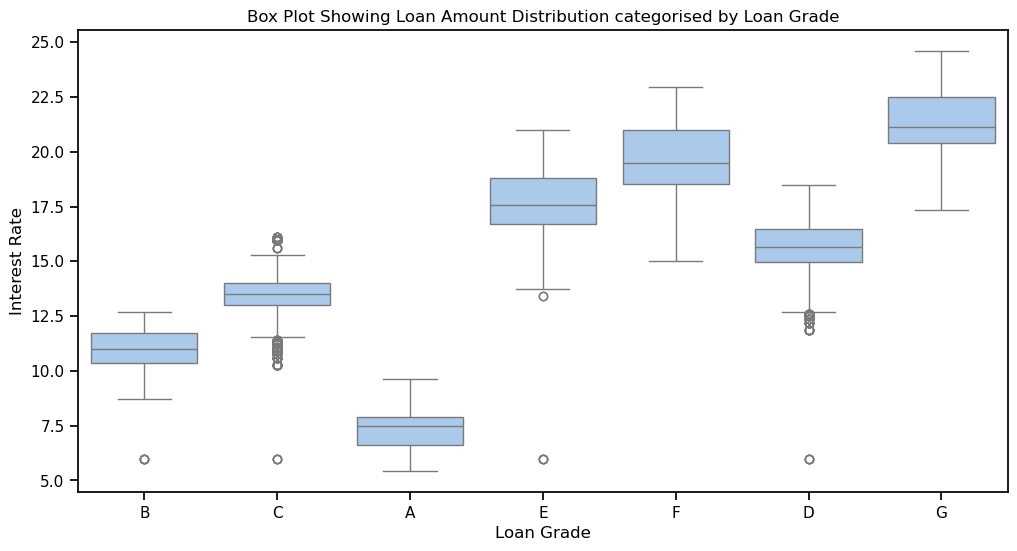

In [2210]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_loan, x="grade", y="int_rate")

plt.title('Box Plot Showing Loan Amount Distribution categorised by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()

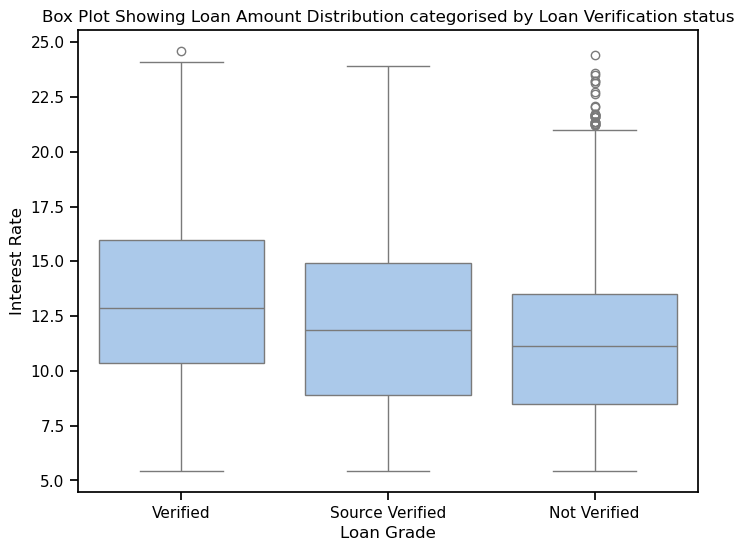

In [2212]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_loan, x="verification_status", y="int_rate")

plt.title('Box Plot Showing Loan Amount Distribution categorised by Loan Verification status')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()

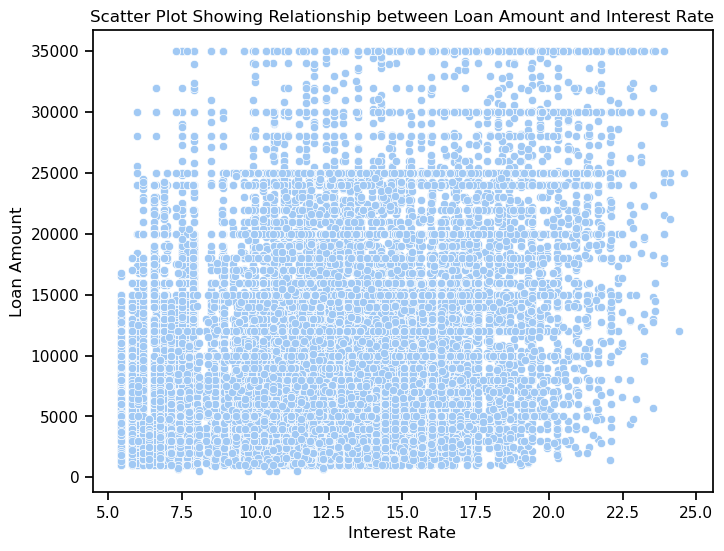

In [2214]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='int_rate', y='loan_amnt', data=df_loan)
plt.title('Scatter Plot Showing Relationship between Loan Amount and Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')
plt.show()

## 11. Variable - Loan Year

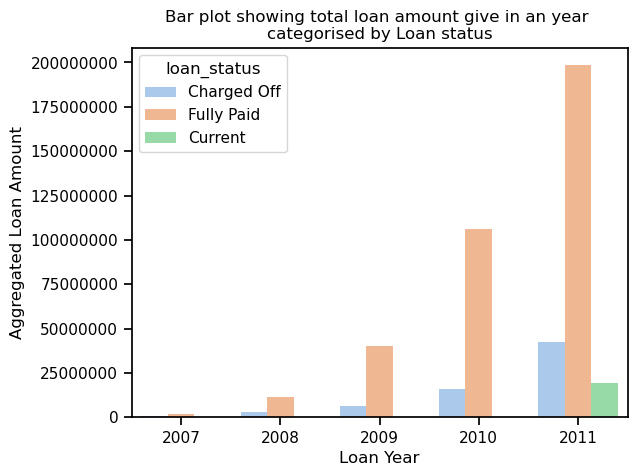

In [2218]:
df_loan['issue_d'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y')
df_loan['loan_year'] = df_loan['issue_d'].dt.year

df_loan_grouped = df_loan.groupby(['loan_year','loan_status'])['loan_amnt'].sum().reset_index()

plt.ticklabel_format(style='plain', axis='both')

sns.barplot(x='loan_year', y='loan_amnt', data=df_loan_grouped, hue='loan_status')

plt.title('Bar plot showing total loan amount give in an year \ncategorised by Loan status')
plt.xlabel('Loan Year')
plt.ylabel('Aggregated Loan Amount')
plt.show()

</br>

## 12. Variable - Revolving line utilization rate

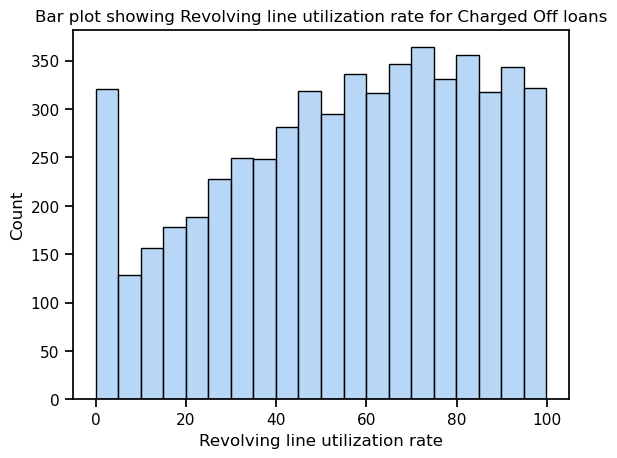

In [2222]:
sns.histplot(data=df_loan_chargedoff, x = 'revol_util')
plt.title('Bar plot showing Revolving line utilization rate for Charged Off loans')
plt.xlabel('Revolving line utilization rate')
plt.ylabel('Count')
plt.show()

</br>

# **Observations** - 

#### 1. It is observed that 14.2% of total loans get defaulted.
#### 2. It is observed that for majority of loans the loan amount is between 5000 and 15000 both in case of fully paid and defaulted loans.
#### 3. The loan amount for majority of defaulters are less then 15000.
#### 4. Highest average loan amount are given against the loan graded as 'G'.
#### 5. Borrower living in rented house or have mortgage their homes have defaulted more as compared to borrower living in own house. 
#### 6. The number of loans taken for the purpose of debt consolidation is highest and loan defaulters are also highest. 
#### 7. Loans with 'Verified' and 'Source Verified' status are most likely to default.
#### 8. Higher the DTI, chances of default are more.
#### 9. Higher the loan tenure the chances of default are high.
#### 10. Loans graded as 'C' and 'D' have maximum chances of default.
#### 11. Higher the loan grade, high is the interest rate.
#### 12. Most number of defaults happened in year 2011.
#### 13. Borrower having Revolving line utilization rate higher then 50 is most likely to default.